In [3]:
import numpy as np
import scipy
from scipy.signal import fftconvolve
from scipy import ndimage
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio

In [4]:
file_path = "testing/bulletin_hi.mp3"

In [5]:
bulletin_audio, bulletin_sampling_rate = librosa.load(file_path,sr=None,mono=True,offset=0.0,duration=None)

/home/sujit27/anaconda3/envs/audioprocessing/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [6]:
print(len(bulletin_audio))
print(bulletin_sampling_rate)

13406400
22050


In [7]:
Audio(file_path)

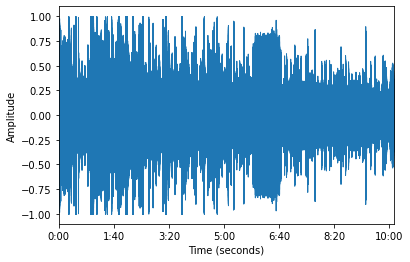

In [8]:
from librosa import display
plt.figure()
librosa.display.waveplot(y = bulletin_audio, sr = bulletin_sampling_rate)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

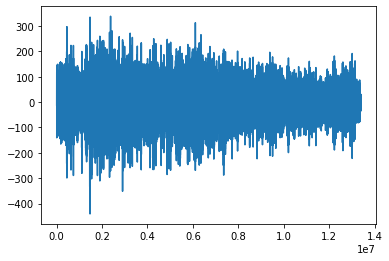

In [9]:
# कोविड को देखते हुए श्रोताओं से अपील है किकोई भी लापरवाही न बरतें ।
# 1499400 - 1587600
corr = fftconvolve(bulletin_audio,bulletin_audio[1499400:1587600],mode='same')
plt.plot(corr)

/home/sujit27/anaconda3/envs/audioprocessing/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


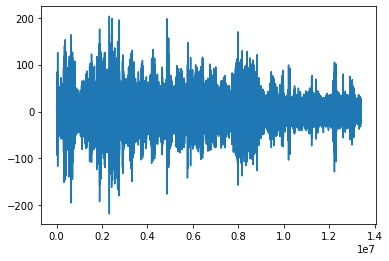

In [10]:
# कोविड को देखते हुए श्रोताओं से अपील है किकोई भी लापरवाही न बरतें ।
sample_audio, sample_sampling_rate = librosa.load("testing/sample_hi.mp3",sr=22050,mono=True,offset=0.0,duration=None)
corr = fftconvolve(bulletin_audio,sample_audio,mode='same')
plt.plot(corr)

### checking FFT implementation

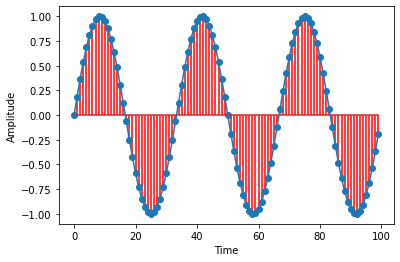

In [11]:
samples = 100
f = 3
x = np.arange(samples)
y1 = np.sin(2*np.pi*f * (x/samples))
plt.figure()
plt.stem(x,y1,'r',)
plt.plot(x,y1)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

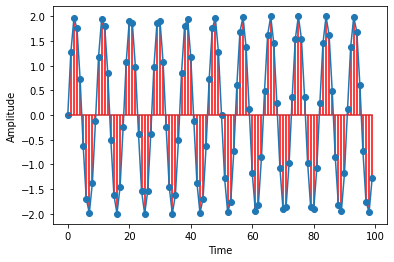

In [12]:
samples = 100
f = 11
x = np.arange(samples)
y2 = 2 * np.sin(2*np.pi*f * (x/samples))
plt.figure()
plt.stem(x,y2,'r',)
plt.plot(x,y2)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

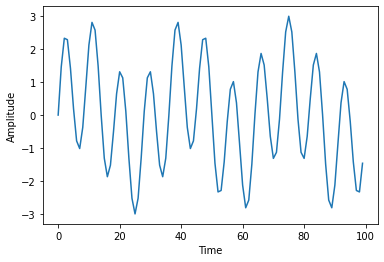

In [13]:
y3 = y1 + y2
plt.figure()
plt.plot(x,y3)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

In [14]:
def fft_plot(audio, sampling_rate):
    n = len(audio)
    T = 1/sampling_rate
    yf = scipy.fft.fft(audio)
    xf = np.linspace(0.0, 1.0/(2.0*T),int(n/2))
    fig, ax = plt.subplots()
    ax.plot(xf, 2.0/n * np.abs(yf[:n//2]))
    plt.grid()
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude")
    return plt.show()

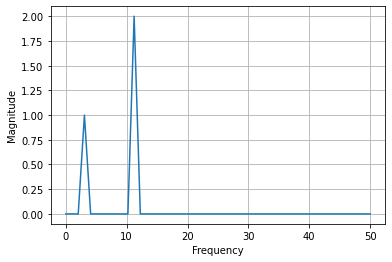

In [15]:
fft_plot(y3,100)

### FFT of real audio signal

In [16]:
def audio_to_fft_plot(audio, sampling_rate, xlimit=8000,title="FFT"):
    n = len(audio)
    T = 1/sampling_rate
    yf = scipy.fft.fft(audio)
    xf = np.linspace(0.0, 1.0/(2.0*T),int(n/2))
    fig, ax = plt.subplots()
    ax.plot(xf, 2.0/n * np.abs(yf[:n//2]))
    plt.grid()
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude")
    fig.set_figheight(10)
    fig.set_figwidth(15)
    plt.xlim([0,xlimit])
    plt.title(title)
    return plt.show()

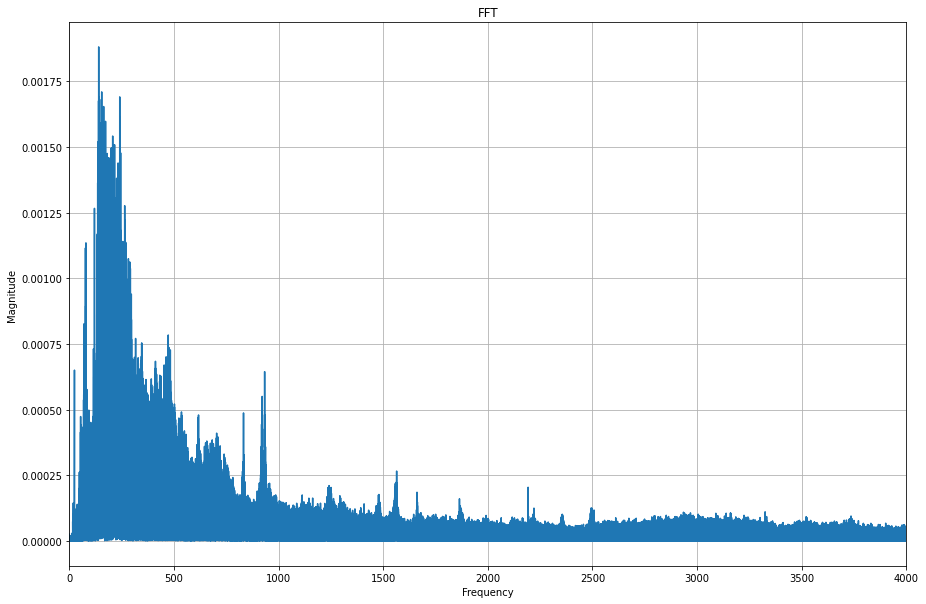

In [17]:
audio_to_fft_plot(bulletin_audio,bulletin_sampling_rate,4000)

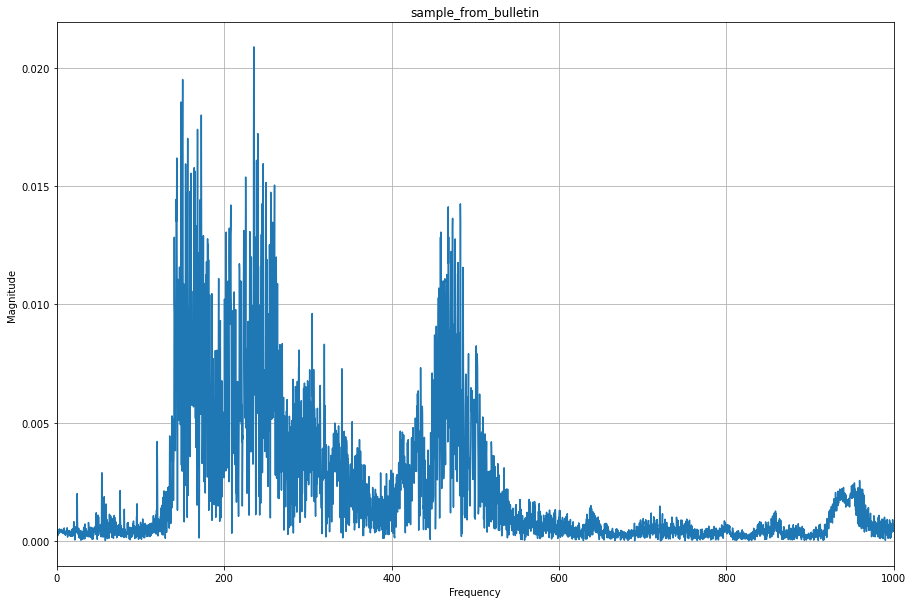

In [18]:
# fft of "कोविड को देखते हुए श्रोताओं से अपील है किकोई भी लापरवाही न बरतें ।"
audio_to_fft_plot(bulletin_audio[1499400:1587600],bulletin_sampling_rate,1000,title="sample_from_bulletin")

In [19]:
Audio("testing/sample_hi.mp3")

/home/sujit27/anaconda3/envs/audioprocessing/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


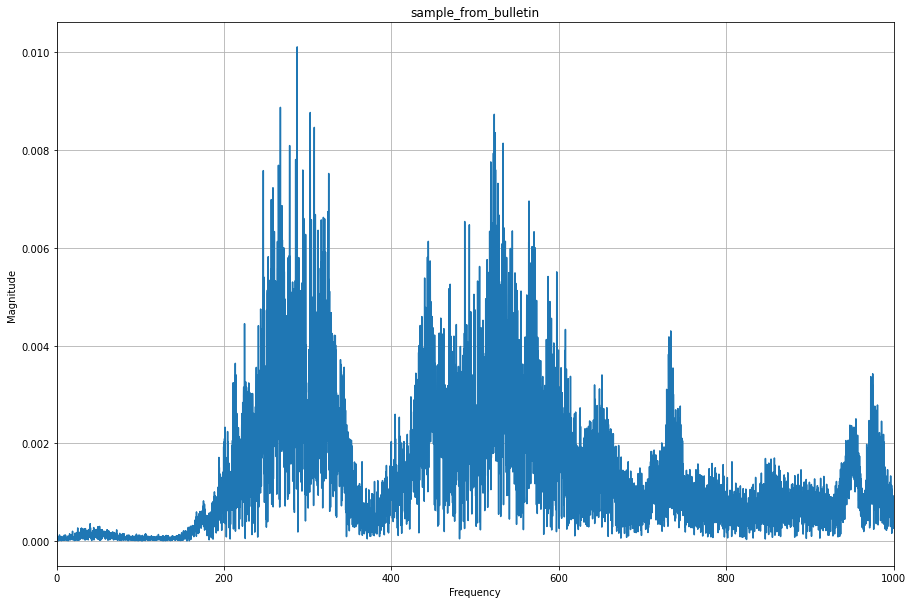

In [20]:
# read mp3 from synthesizer on text "कोविड को देखते हुए श्रोताओं से अपील है किकोई भी लापरवाही न बरतें ।" and fft
sample_audio, sample_sampling_rate = librosa.load("testing/sample_hi.mp3",sr=22050,mono=True,offset=0.0,duration=None)
audio_to_fft_plot(sample_audio,sample_sampling_rate,1000,title="sample_from_bulletin")

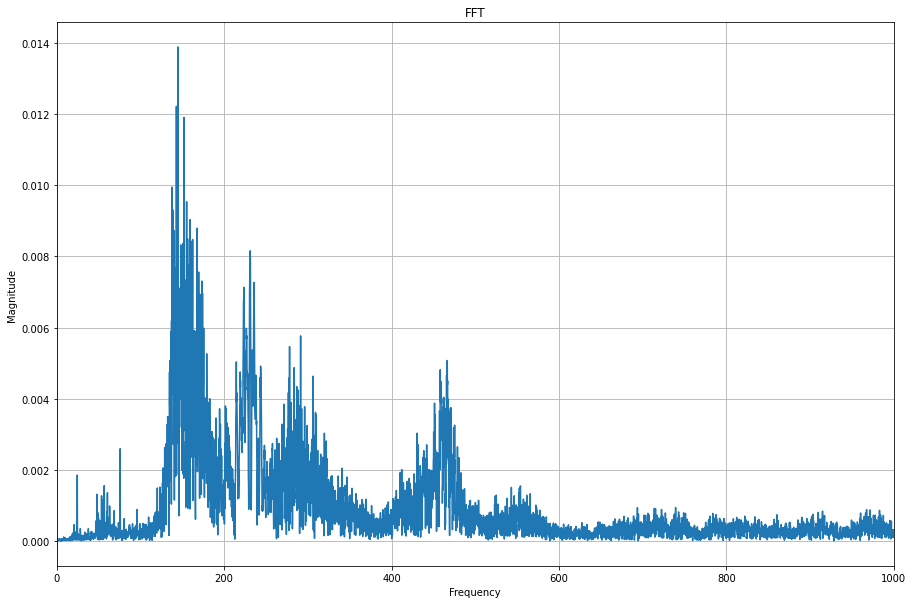

In [21]:
# fft of "यह दुर्घटना आज सुबह काशी विश्वनाथ गलियारा क्षेत्र मेंएक पुरानी इमारत में निर्माण कार्य के दौरान हुई ।"
audio_to_fft_plot(bulletin_audio[10473750:10584000],bulletin_sampling_rate,1000)

In [22]:
Audio("testing/sample_hi_2.mp3")

/home/sujit27/anaconda3/envs/audioprocessing/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


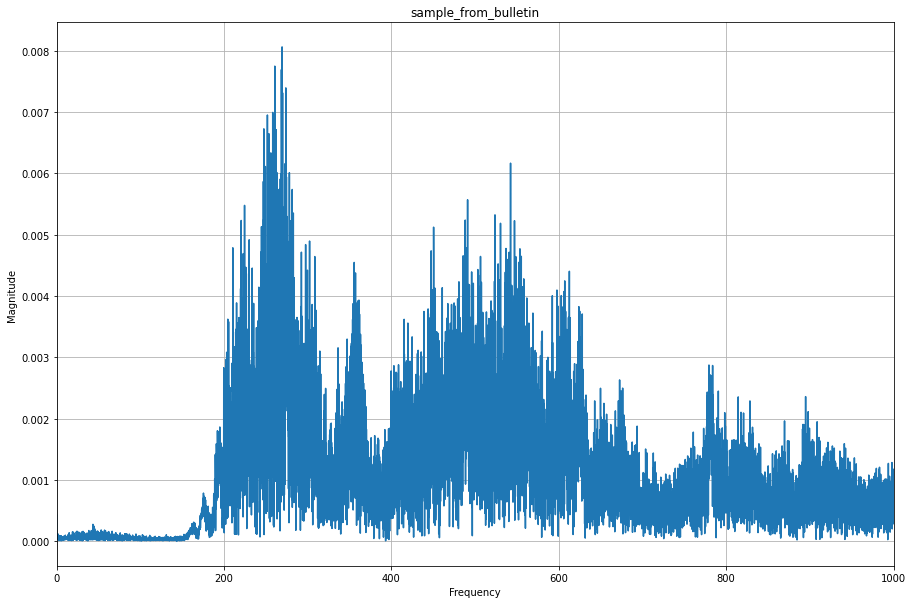

In [23]:
# read mp3 from synthesizer on text "यह दुर्घटना आज सुबह काशी विश्वनाथ गलियारा क्षेत्र मेंएक पुरानी इमारत में निर्माण कार्य के दौरान हुई ।" and fft
sample_audio, sample_sampling_rate = librosa.load("testing/sample_hi_2.mp3",sr=22050,mono=True,offset=0.0,duration=None)
audio_to_fft_plot(sample_audio,sample_sampling_rate,1000,title="sample_from_bulletin")

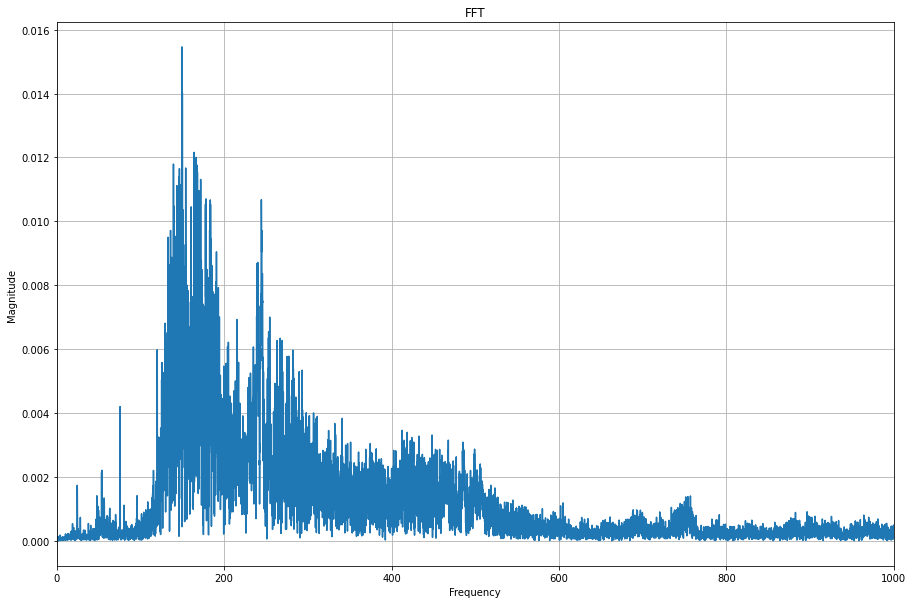

In [24]:
# fft of "फिर भीयदि कोई बीमारी की चपेट में आता है तोवह समुचित उपचार का हकदार है, सरकार इस दिशा में सभी कदम उठा रहीहै।"
audio_to_fft_plot(bulletin_audio[5027400:5203800],bulletin_sampling_rate,1000)

In [25]:
Audio("testing/sample_hi_3.mp3")

/home/sujit27/anaconda3/envs/audioprocessing/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


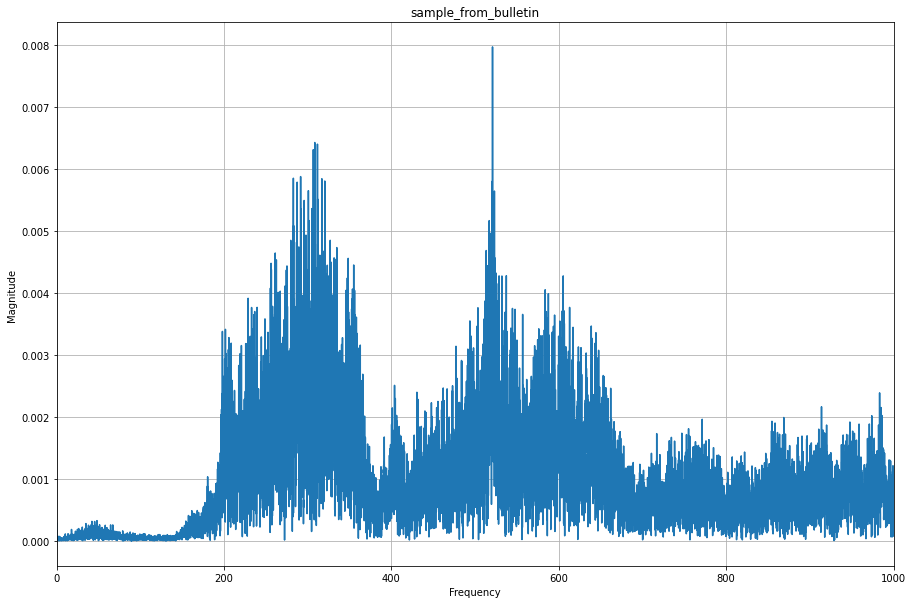

In [26]:
# read mp3 from synthesizer on text "फिर भीयदि कोई बीमारी की चपेट में आता है तोवह समुचित उपचार का हकदार है, सरकार इस दिशा में सभी कदम उठा रहीहै।" and fft
sample_audio, sample_sampling_rate = librosa.load("testing/sample_hi_3.mp3",sr=22050,mono=True,offset=0.0,duration=None)
audio_to_fft_plot(sample_audio,sample_sampling_rate,1000,title="sample_from_bulletin")

## SPECTROGRAM

In [27]:
def spectrogram(samples, sample_rate, stride_ms = 10.0, 
                          window_ms = 20.0, max_freq = None, eps = 1e-14):

    stride_size = int(0.001 * sample_rate * stride_ms)
    window_size = int(0.001 * sample_rate * window_ms)

    # Extract strided windows
    truncate_size = (len(samples) - window_size) % stride_size
    samples = samples[:len(samples) - truncate_size]
    nshape = (window_size, (len(samples) - window_size) // stride_size + 1)
    nstrides = (samples.strides[0], samples.strides[0] * stride_size)
    windows = np.lib.stride_tricks.as_strided(samples, 
                                          shape = nshape, strides = nstrides)
    
    assert np.all(windows[:, 1] == samples[stride_size:(stride_size + window_size)])

    # Window weighting, squared Fast Fourier Transform (fft), scaling
    weighting = np.hanning(window_size)[:, None]
    
    fft = np.fft.rfft(windows * weighting, axis=0)
    fft = np.absolute(fft)
    fft = fft**2
    
    scale = np.sum(weighting**2) * sample_rate
    fft[1:-1, :] *= (2.0 / scale)
    fft[(0, -1), :] /= scale
    
    # Prepare fft frequency list
    freqs = float(sample_rate) / window_size * np.arange(fft.shape[0])
    
    # Compute spectrogram feature
    ind = np.where(freqs <= max_freq)[0][-1] + 1
    specgram = np.log(fft[:ind, :] + eps)
    return specgram

(82, 500)


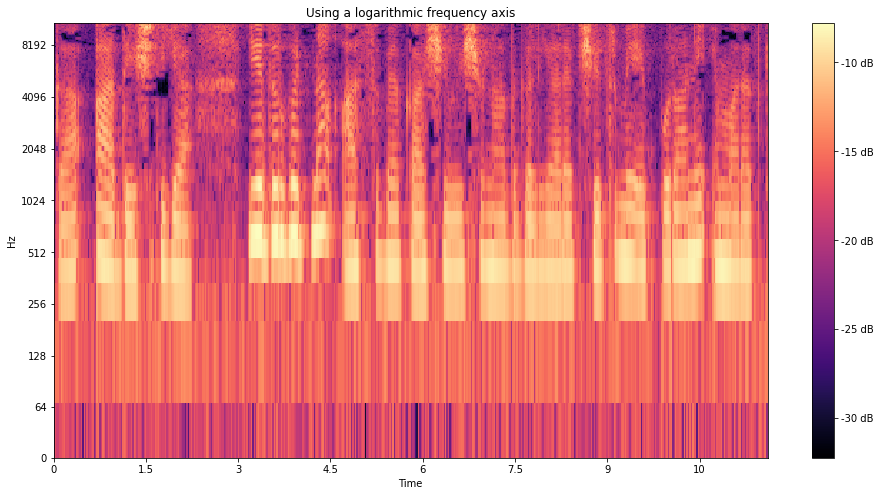

In [28]:
# spectrogram of "यह दुर्घटना आज सुबह काशी विश्वनाथ गलियारा क्षेत्र मेंएक पुरानी इमारत में निर्माण कार्य के दौरान हुई ।"
spec_bulletin_sample_1 = spectrogram(bulletin_audio[10473750:10584000],bulletin_sampling_rate,max_freq=4096)
fig, ax = plt.subplots()
img = librosa.display.specshow(spec_bulletin_sample_1, x_axis='time', y_axis='log', ax=ax)
ax.set(title='Using a logarithmic frequency axis')
fig.set_figheight(8)
fig.set_figwidth(16)
fig.colorbar(img, ax=ax, format="%+2.f dB")
print(spec_bulletin_sample_1.shape)

/home/sujit27/anaconda3/envs/audioprocessing/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(82, 850)


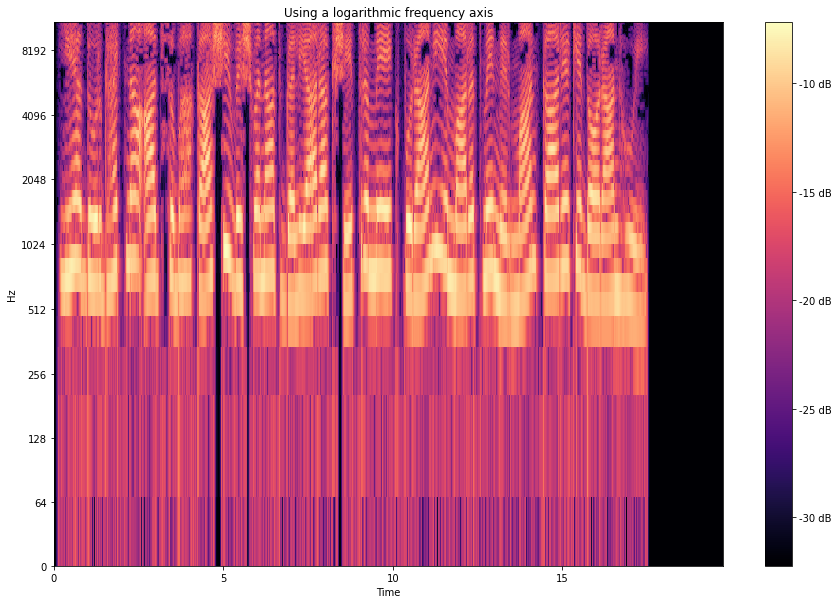

In [29]:
# read mp3 from synthesizer on text "यह दुर्घटना आज सुबह काशी विश्वनाथ गलियारा क्षेत्र मेंएक पुरानी इमारत में निर्माण कार्य के दौरान हुई ।" and fft
sample_audio, sample_sampling_rate = librosa.load("testing/sample_hi_2.mp3",sr=22050,mono=True,offset=0.0,duration=None)
spec_synth_sample_1 = spectrogram(sample_audio,sample_sampling_rate,max_freq=4096)
fig, ax = plt.subplots()
img = librosa.display.specshow(spec_synth_sample_1, x_axis='time', y_axis='log', ax=ax)
ax.set(title='Using a logarithmic frequency axis')
fig.set_figheight(10)
fig.set_figwidth(15)
fig.colorbar(img, ax=ax, format="%+2.f dB")
print(spec_synth_sample_1.shape)

(82, 800)


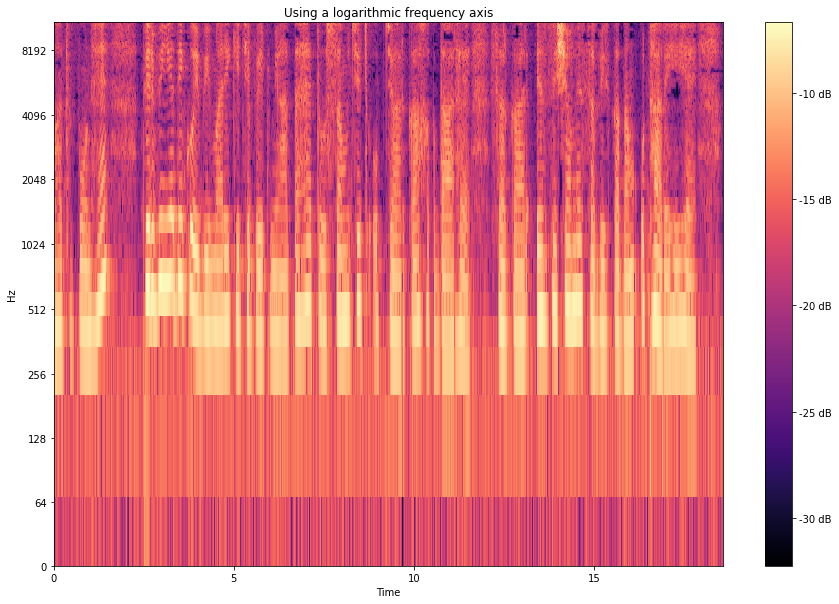

In [30]:
# spectrogram of "फिर भीयदि कोई बीमारी की चपेट में आता है तोवह समुचित उपचार का हकदार है, सरकार इस दिशा में सभी कदम उठा रहीहै।"
spec_bulletin_sample_2 = spectrogram(bulletin_audio[5027400:5203800],bulletin_sampling_rate,max_freq=4096)
fig, ax = plt.subplots()
img = librosa.display.specshow(spec_bulletin_sample_2, x_axis='time', y_axis='log', ax=ax)
ax.set(title='Using a logarithmic frequency axis')
fig.set_figheight(10)
fig.set_figwidth(15)
fig.colorbar(img, ax=ax, format="%+2.f dB")
print(spec_bulletin_sample_2.shape)

/home/sujit27/anaconda3/envs/audioprocessing/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(82, 970)


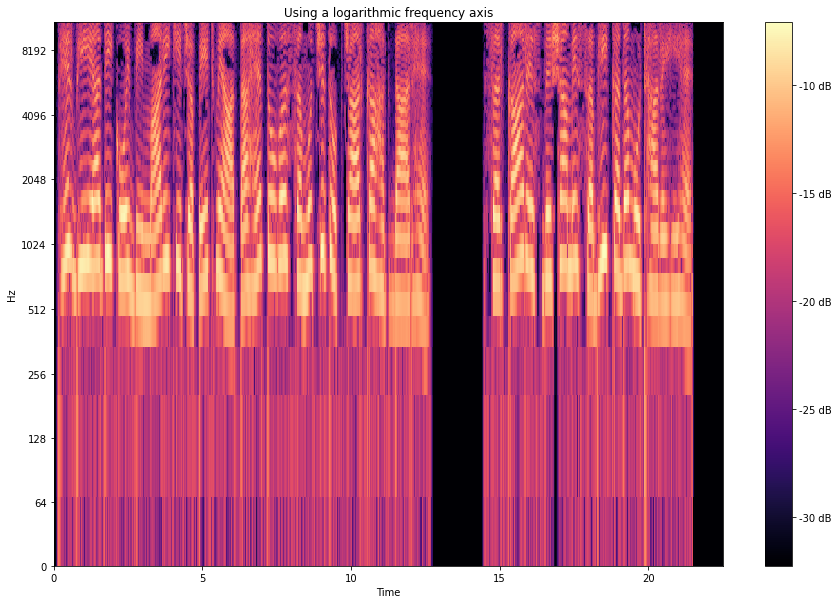

In [31]:
sample_audio, sample_sampling_rate = librosa.load("testing/sample_hi_3.mp3",sr=22050,mono=True,offset=0.0,duration=None)
spec_synth_sample_2 = spectrogram(sample_audio,sample_sampling_rate,max_freq=4096)
fig, ax = plt.subplots()
img = librosa.display.specshow(spec_synth_sample_2, x_axis='time', y_axis='log', ax=ax)
ax.set(title='Using a logarithmic frequency axis')
fig.set_figheight(10)
fig.set_figwidth(15)
fig.colorbar(img, ax=ax, format="%+2.f dB")
print(spec_synth_sample_2.shape)

In [32]:
spec_bulletin_full= spectrogram(bulletin_audio,bulletin_sampling_rate,max_freq=4096)
print(spec_bulletin_full.shape)

(82, 60937)


In [33]:
# conv_output = ndimage.convolve(spec_bulletin_full,spec_bulletin_sample_1,mode='constant', cval=0.0)